In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [40]:
S = 100  #Number of runs
G_array = np.zeros((S))  #Array that holds the number of generations per run
N = 60  #Number of individuals
D = 11  #Dimension of individual

In [41]:
#Opening files one run at the time and noting how many generations per run there were
for s in range(0, S):

    #Opening a file and copying all results
    file_name = 'Results_Schaffers/results_seed%d.txt' % s
    with open(file_name) as f:
        content = f.readlines()
    f.close()

    #Specifically checking for the number of runs
    for line in range(0, len(content)):
        if(content[line].split()[0] == '===============NewGeneration'):
            line += 1
            G_array[s] = int(content[line].split()[0])

    #Clearing some memory
    del content

#Checking whether the number of generations is the same for each run
#If not, output some text to make the user aware of this (it might lead to some discrepancies later on)
for s in range(0, S):
    if(G_array[0] == G_array[s]):
        continue
    else:
        print("Pay attention")
G = int(G_array[0])+1 #+1 because of generation 0, which is the initial state

In [152]:
#Declaring the 3D array that will hold all results
#First index is the fitness of individual i
#Second index is what generation
#Third index is what run
results1 = np.zeros((N, G, S))
results2 = np.zeros((N, G, S))
results3 = np.zeros((N, G, S))
results123 = np.zeros((3*N,G,S))


#Now copy all the data to the results array
for s in range(0, S):

    #Opening a file and putting the information in content
    file_name = 'Results_Schaffers/results_seed%d.txt' % s
    with open(file_name) as f:
        content = f.readlines()
    f.close()

    #Go through content line by line and copy the coordinates to the appropriate indices

    line=0
    while (line<len(content)):
        if (content[line].split()[0] == '===============NewGeneration'):
            generation = int(content[line+1].split()[0])
        if (content[line].split()[0] == '===============ConventionalAlgorithm'):
            line += 1
            for i in range(0,N):
                results1[i, generation, s] = content[line].split()[33].strip(',').strip('[').strip(']')
                results123[i, generation, s] = content[line].split()[33].strip(',').strip('[').strip(']')
                line+=1
        if (content[line].split()[0] == '===============DifferentialEvolution'):
            line += 1
            for i in range(0,N):
                results2[i, generation, s] = content[line].split()[33].strip(',').strip('[').strip(']')
                results123[i+N, generation, s] = content[line].split()[33].strip(',').strip('[').strip(']')
                line+=1
        if (content[line].split()[0] == '===============ParticleSwarmOptimisation'):
            line += 1
            for i in range(0,N):
                results3[i, generation, s] = content[line].split()[33].strip(',').strip('[').strip(']')
                results123[i+(2*N), generation, s] = content[line].split()[33].strip(',').strip('[').strip(']')
                line+=1
        else:
            line+=1
                
            
    
    #Clearing some memory
    del content
    
    
    





0.327836696754


In [156]:
#Now it's time for some statistical analysis
#First take the average per generation for each run
average_per_generation_one_run1 = np.zeros((G, S))
average_per_generation_one_run2 = np.zeros((G, S))
average_per_generation_one_run3 = np.zeros((G, S))
average_per_generation_one_run123 = np.zeros((G, S))
champions_per_run1 = np.zeros((G, S))
champions_per_run2 = np.zeros((G, S))
champions_per_run3 = np.zeros((G, S))
champions_per_run123 = np.zeros((G, S))
for s in range(0, S):
    for t in range(0, G):
        average_per_generation_one_run1[t, s] = np.mean(results1[:, t, s])
        average_per_generation_one_run2[t, s] = np.mean(results2[:, t, s])
        average_per_generation_one_run3[t, s] = np.mean(results3[:, t, s])
        average_per_generation_one_run123[t, s] = np.mean(results123[:, t, s])
        champions_per_run1[t, s] = np.max(results1[:, t, s])
        champions_per_run2[t, s] = np.max(results2[:, t, s])
        champions_per_run3[t, s] = np.max(results3[:, t, s])
        champions_per_run123[t, s] = np.max(results123[:, t, s])

#np.savetxt('results/averages_schaffers_1.txt', average_per_generation_one_run1, fmt='%f')
#np.savetxt('results/champions_schaffers_1.txt', champions_per_run1, fmt='%f')
#np.savetxt('results/averages_schaffers_2.txt', average_per_generation_one_run2, fmt='%f')
#np.savetxt('results/champions_schaffers_2.txt', champions_per_run2, fmt='%f')
#np.savetxt('results/averages_schaffers_3.txt', average_per_generation_one_run3, fmt='%f')
#np.savetxt('results/champions_schaffers_3.txt', champions_per_run3, fmt='%f')
#np.savetxt('results/averages_schaffers_123.txt', average_per_generation_one_run123, fmt='%f')
#np.savetxt('results/champions_schaffers_123.txt', champions_per_run123, fmt='%f')


overall_champions1 = np.zeros((G))
overall_champions2 = np.zeros((G))
overall_champions3 = np.zeros((G))
overall_champions123 = np.zeros((G))
for t in range(0, G):
    overall_champions1[t] = np.max(champions_per_run1[t, :])
    overall_champions2[t] = np.max(champions_per_run2[t, :])
    overall_champions3[t] = np.max(champions_per_run3[t, :])
    overall_champions123[t] = np.max(champions_per_run123[t, :])

median_per_generation1 = np.zeros((G))
median_per_generation2 = np.zeros((G))
median_per_generation3 = np.zeros((G))
median_per_generation123 = np.zeros((G))
first_quartile1 = np.zeros((G))
third_quartile1 = np.zeros((G))
first_quartile2 = np.zeros((G))
third_quartile2 = np.zeros((G))
first_quartile3 = np.zeros((G))
third_quartile3 = np.zeros((G))
first_quartile123 = np.zeros((G))
third_quartile123 = np.zeros((G))
for t in range(0, G):
    median_per_generation1[t] = np.median(average_per_generation_one_run1[t, :])
    median_per_generation2[t] = np.median(average_per_generation_one_run2[t, :])
    median_per_generation3[t] = np.median(average_per_generation_one_run3[t, :])
    median_per_generation123[t] = np.median(average_per_generation_one_run123[t, :])
    first_quartile1[t] = np.percentile(average_per_generation_one_run1[t, :], 25)
    third_quartile1[t] = np.percentile(average_per_generation_one_run1[t, :], 75)
    first_quartile2[t] = np.percentile(average_per_generation_one_run2[t, :], 25)
    third_quartile2[t] = np.percentile(average_per_generation_one_run2[t, :], 75)
    first_quartile3[t] = np.percentile(average_per_generation_one_run3[t, :], 25)
    third_quartile3[t] = np.percentile(average_per_generation_one_run3[t, :], 75)
    first_quartile123[t] = np.percentile(average_per_generation_one_run123[t, :], 25)
    third_quartile123[t] = np.percentile(average_per_generation_one_run123[t, :], 75)

#
# np.savetxt('results/median_katsuura_DE.txt', median_per_generation, fmt='%f')
# np.savetxt('results/firstquartile_katsuura_DE.txt', first_quartile, fmt='%f')
# np.savetxt('results/thirdquartile_katsuura_DE.txt', third_quartile, fmt='%f')
# np.savetxt('results/champions_katsuura_DE.txt', overall_champions, fmt='%f')





In [151]:
print median_per_generation3[206] #fitness suddenly drops from generation 126 to 127 and 151 to 152 when epoch is 125

#121 to 122 and 141 to 142 when epoch=20

5.96909389151


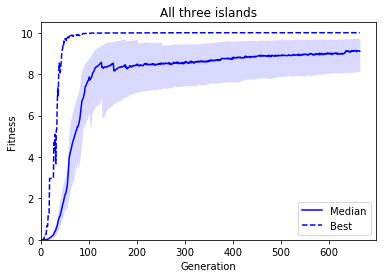

In [154]:
#Plotting median with interquartile distance
plt.plot(range(0,G), median_per_generation123, color='blue', label='Median')
plt.fill_between(range(0, G), third_quartile123, first_quartile123, color='blue', alpha=0.15, linewidth=0)
plt.plot(range(0,G), overall_champions2, color='blue', linestyle='--', label='Best')
plt.title('All three islands')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.legend()
plt.show()